<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/Clusterin_UnSuper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
from google.colab import files
uploaded=files.upload()

Saving Customers.csv to Customers (2).csv


In [150]:
data=pd.read_csv('Customers.csv')

In [151]:
data1=data.copy()

In [152]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [153]:
type(data)

pandas.core.frame.DataFrame

In [154]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [155]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
le=LabelEncoder()
data['Profession']=le.fit_transform(data['Profession'])

In [158]:
data.shape

(2000, 8)

In [159]:
import scipy.cluster.hierarchy as hierarchy

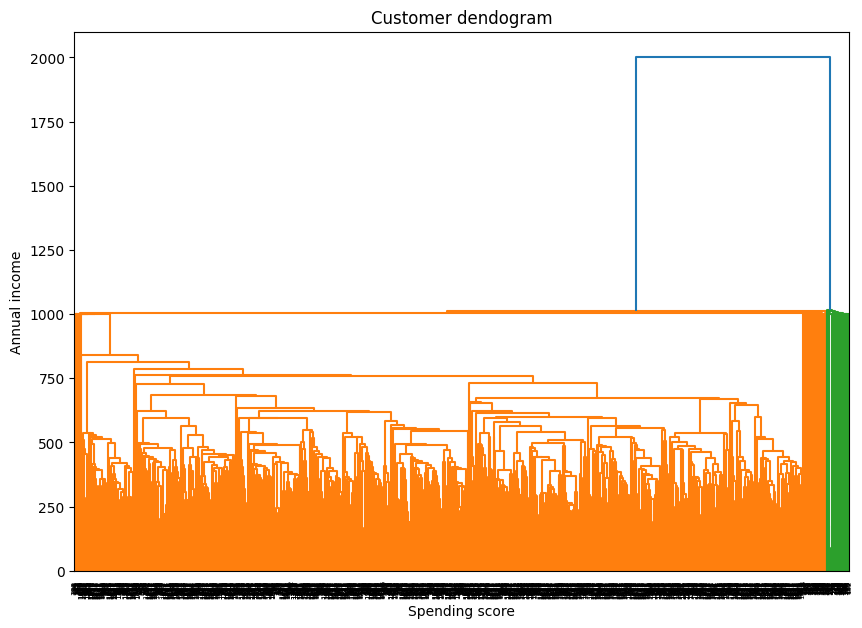

In [160]:
plt.figure(figsize=(10,7))
plt.title('Customer dendogram')
plt.xlabel('Spending score')
plt.ylabel('Annual income')
dend=hierarchy.dendrogram(hierarchy.linkage(data))
plt.show()

In [161]:
# predict the cluster for the observations

In [162]:
from sklearn.cluster import AgglomerativeClustering

In [163]:
cluster=AgglomerativeClustering(n_clusters=5)
cluster.fit_predict(data)

array([1, 1, 2, ..., 2, 3, 0])

In [164]:
data.iloc[:, 0]

,CustomerID
0,1
1,2
2,3
3,4
4,5
...,...
1995,1996
1996,1997
1997,1998
1998,1999


In [165]:
data.iloc[:, 1]

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,1
1998,1


In [166]:
# plot the cluster scatter plot

In [167]:
type(data)

pandas.core.frame.DataFrame

In [168]:
data=data.iloc[:, 3:5].values

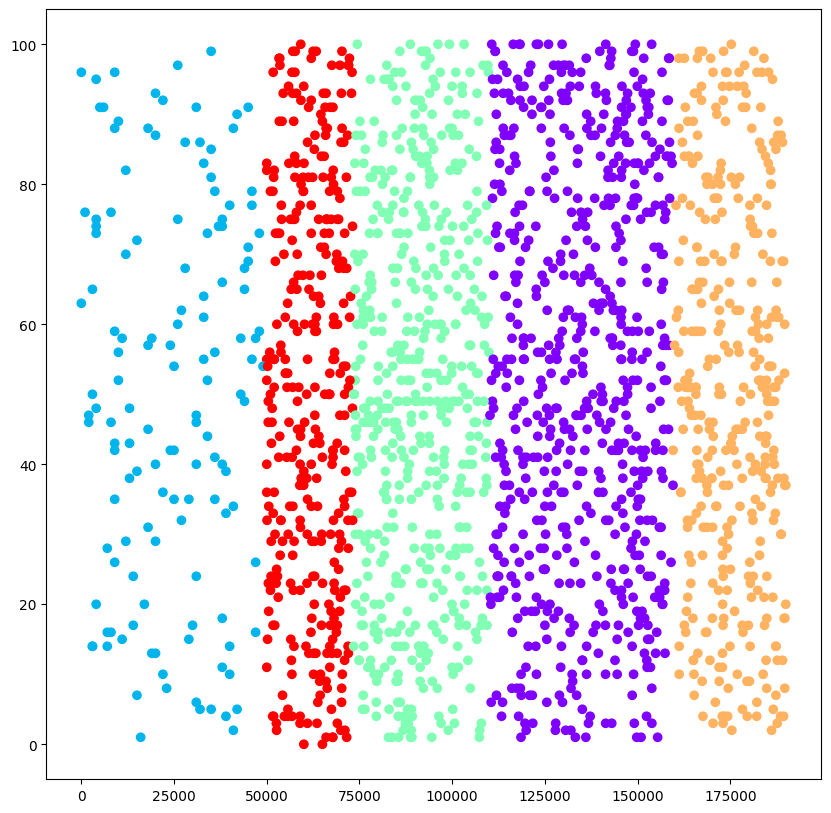

In [169]:
plt.figure(figsize=(10, 10))  # Provide both width & height
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.show()


In [170]:
data[0:200,0:1]

array([[ 15000],
       [ 35000],
       [ 86000],
       [ 59000],
       [ 38000],
       [ 58000],
       [ 31000],
       [ 84000],
       [ 97000],
       [ 98000],
       [  7000],
       [ 93000],
       [ 80000],
       [ 91000],
       [ 19000],
       [ 51000],
       [ 29000],
       [ 89000],
       [ 20000],
       [ 62000],
       [ 96000],
       [  4000],
       [ 42000],
       [ 71000],
       [ 67000],
       [ 52000],
       [ 68000],
       [ 78000],
       [ 18000],
       [ 20000],
       [ 39000],
       [ 34000],
       [ 59000],
       [ 62000],
       [ 91000],
       [ 95000],
       [ 14000],
       [ 62000],
       [  9000],
       [ 69000],
       [ 25000],
       [ 85000],
       [ 22000],
       [ 33000],
       [ 72000],
       [  3000],
       [ 52000],
       [ 71000],
       [ 78000],
       [ 25000],
       [ 88000],
       [ 97000],
       [ 74000],
       [ 68000],
       [ 18000],
       [ 95000],
       [ 71000],
       [  8000],
       [ 57000

In [171]:
data.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [172]:
# data.head(1)
clus=pd.DataFrame(cluster.fit_predict(data),columns=['clus'])
# data.head()
data=pd.DataFrame(data)
print(data.head())
data=pd.concat([data,clus],axis=1)
print(data.head())

       0   1
0  15000  39
1  35000  81
2  86000   6
3  59000  77
4  38000  40
       0   1  clus
0  15000  39     0
1  35000  81     0
2  86000   6     1
3  59000  77     0
4  38000  40     0


In [173]:
data['clus'].value_counts()

,count
clus,
1,556
2,451
3,363
0,335
4,295


In [174]:
data1['Annual Income ($)'].value_counts()

,count
Annual Income ($),
50000,7
9000,7
97000,6
85000,6
4000,6
...,...
111859,1
186655,1
164598,1


In [175]:
data1.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [176]:
data1['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
49,34
42,33
55,32
17,31
46,28
...,...
72,12
6,12
9,12
